In [1]:
import numpy as np
import matplotlib.pyplot as plt

import central_system as cs
import analyze_control as ac

# ダクト長さ

In [2]:
def draw_duct_length(room_number):
    
    xs = np.arange(120)
    ys_total = [cs.calc_duct_length(x)[room_number] for x in xs]
    
    plt.style.use('seaborn-whitegrid')

    fig = plt.figure()

    ax = fig.subplots()
    
    ax.plot(xs, ys_total, label='total')
    
    plt.legend()
    plt.show()

#### room 1

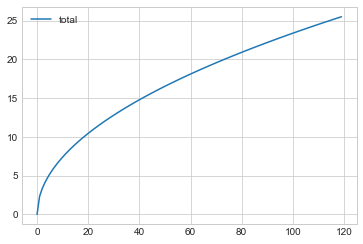

In [3]:
draw_duct_length(0)

#### room 2

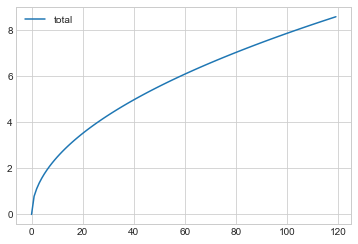

In [4]:
draw_duct_length(1)

#### room 3

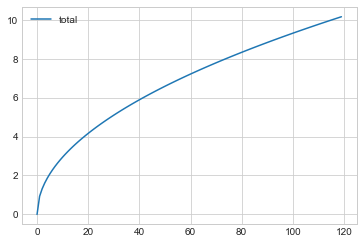

In [5]:
draw_duct_length(2)

#### room 4

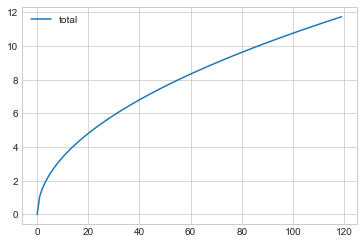

In [6]:
draw_duct_length(3)

#### room 5

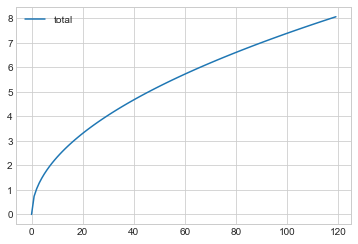

In [7]:
draw_duct_length(4)

# ダクト周囲温度

#### room 1

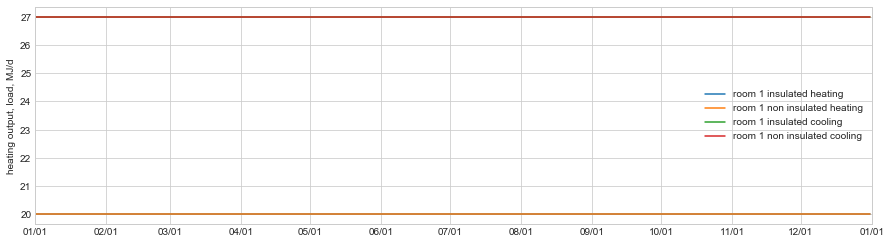

In [8]:
data = [
    (ac.get_duct_ambient_air_temperature(6)[0][0], 'room 1 insulated heating'),
    (ac.get_duct_ambient_air_temperature(52)[0][0], 'room 1 non insulated heating'),
    (ac.get_duct_ambient_air_temperature(6)[1][0], 'room 1 insulated cooling'),
    (ac.get_duct_ambient_air_temperature(52)[1][0], 'room 1 non insulated cooling')
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 2

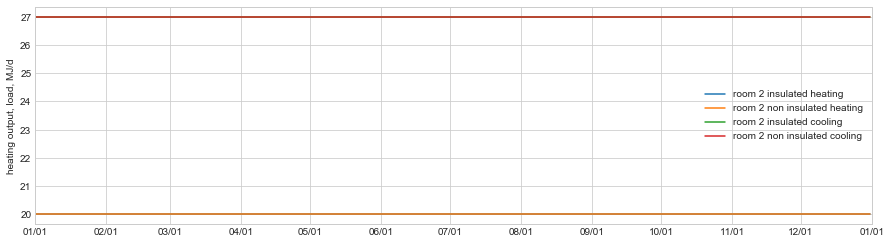

In [9]:
data = [
    (ac.get_duct_ambient_air_temperature(6)[0][1], 'room 2 insulated heating'),
    (ac.get_duct_ambient_air_temperature(52)[0][1], 'room 2 non insulated heating'),
    (ac.get_duct_ambient_air_temperature(6)[1][1], 'room 2 insulated cooling'),
    (ac.get_duct_ambient_air_temperature(52)[1][1], 'room 2 non insulated cooling')
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 3

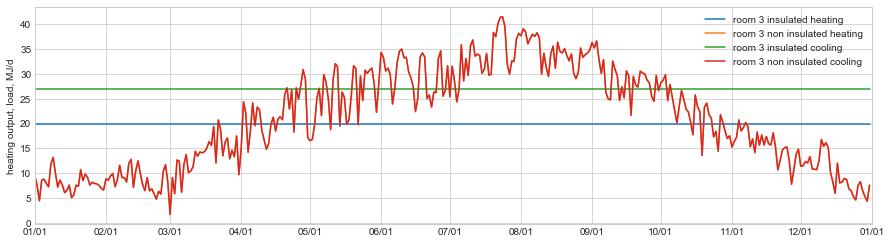

In [10]:
data = [
    (ac.get_duct_ambient_air_temperature(6)[0][2], 'room 3 insulated heating'),
    (ac.get_duct_ambient_air_temperature(52)[0][2], 'room 3 non insulated heating'),
    (ac.get_duct_ambient_air_temperature(6)[1][2], 'room 3 insulated cooling'),
    (ac.get_duct_ambient_air_temperature(52)[1][2], 'room 3 non insulated cooling')
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 4

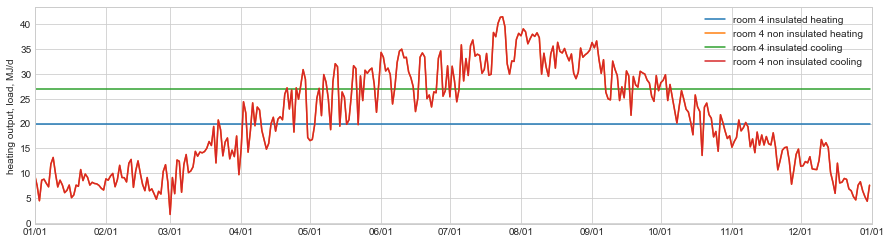

In [11]:
data = [
    (ac.get_duct_ambient_air_temperature(6)[0][3], 'room 4 insulated heating'),
    (ac.get_duct_ambient_air_temperature(52)[0][3], 'room 4 non insulated heating'),
    (ac.get_duct_ambient_air_temperature(6)[1][3], 'room 4 insulated cooling'),
    (ac.get_duct_ambient_air_temperature(52)[1][3], 'room 4 non insulated cooling')
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

#### room 5

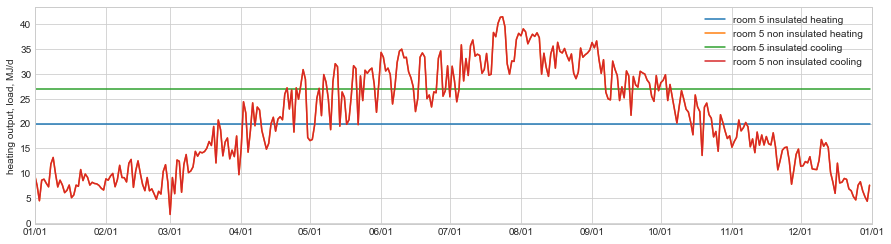

In [12]:
data = [
    (ac.get_duct_ambient_air_temperature(6)[0][4], 'room 5 insulated heating'),
    (ac.get_duct_ambient_air_temperature(52)[0][4], 'room 5 non insulated heating'),
    (ac.get_duct_ambient_air_temperature(6)[1][4], 'room 5 insulated cooling'),
    (ac.get_duct_ambient_air_temperature(52)[1][4], 'room 5 non insulated cooling')
]

ac.draw_graph('heating output, load, MJ/d', data, op='ave')

# ダクト損失

## 定式化

$$Q = \psi l \Delta T_{LMTD} 3600 \times 10^{-6}$$

$Q$: ダクトにおける熱損失, MJ/h  
$\psi$: ダクトの線熱損失係数, W/mK  
$l$: ダクトの長さ, m  
$\Delta T_{LMTD}$: ダクトの対数平均温度差, K  

$$ \Delta T_{LMTD} = \frac{ \theta_{up} - \theta_{down} } { \ln \frac{ \theta_{up} - \theta_{sur} }{ \theta_{down} - \theta_{sur} } } $$

$\theta_{up}$: ダクト上流側空気温度, ℃  
$\theta_{down}$: ダクト下流側空気温度, ℃  
$\theta_{sur}$: ダクト周囲空気温度, ℃  

$$Q = \left( \theta_{up} - \theta_{down} \right) c \rho V 10^{-6}$$

$c$: 空気の比熱, J/kg K  
$\rho$: 空気の密度, kg/m<sup>3</sup>  
$V$: 吹き出し風量, m<sup>3</sup>/h

$$L = \left( \theta_{down} - \theta_{ac} \right) c \rho V 10^{-6}$$

$L$: 負荷, MJ/h （正:暖房、負:冷房）  
$\theta_{ac}$: 居室の温度, ℃

これまでの式を連立させると、以下の式が得られる。

$$ \frac{ \psi l \times 3600 }{ c \rho V } = \ln \frac{ \theta_{up} - \theta_{sur} }{ \frac{L \times 10^6}{c \rho V} + \theta_{ac} - \theta_{sur} } $$

ここで未知数は、$\theta_{up}$・$L$・$V$であり、どれか2つが定まると残り1つの未知数が定まり、それに応じて熱損失も計算できる。

## ダクト上流側空気温度が未知数の場合

$$ \theta_{up} = \theta_{sur} + \left( \frac{L \times 10^6}{c \rho V} + \theta_{ac} - \theta_{sur} \right) \exp \frac{ \psi l \times 3600 }{ c \rho V } $$

#### ダクト周囲温度 50℃・室内設定温度 20℃

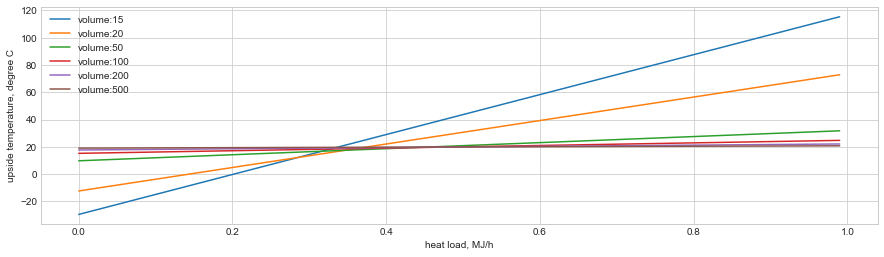

In [13]:
xs = np.arange(start=0.0, stop=1.0, step=0.01)

vs = [15, 20, 50, 100, 200, 500]
ys = [np.vectorize(cs.get_upside_temperature_from_load)(t_sur=50.0, load=xs, v=v, t_ac=20.0, psi=0.49, length=10) for v in vs]

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
for (y, v) in zip(ys, vs):
    ax.plot(xs, y, label='volume:'+ str(v))
ax.set_xlabel('heat load, MJ/h')
ax.set_ylabel('upside temperature, degree C')
plt.legend()
plt.show()

#### ダクト周囲温度 20℃・室内設定温度 28℃

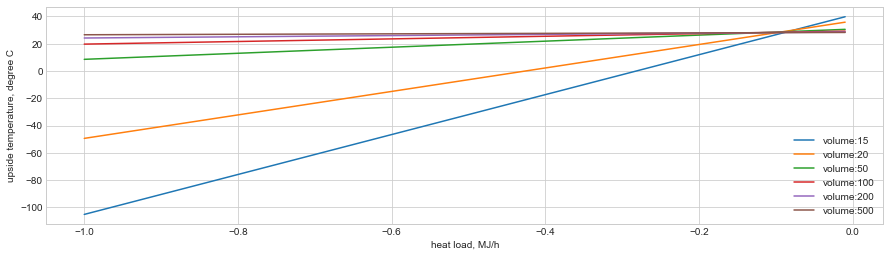

In [14]:
xs = np.arange(start=-1.0, stop=0.0, step=0.01)

vs = [15, 20, 50, 100, 200, 500]
ys = [np.vectorize(cs.get_upside_temperature_from_load)(t_sur=20.0, load=xs, v=v, t_ac=28.0, psi=0.49, length=10) for v in vs]

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
for (y, v) in zip(ys, vs):
    ax.plot(xs, y, label='volume:'+ str(v))
ax.set_xlabel('heat load, MJ/h')
ax.set_ylabel('upside temperature, degree C')
plt.legend()
plt.show()

$$Q = \left( \frac{L \times 10^6}{c \rho V} + \theta_{ac} - \theta_{sur} \right) \left( \exp \frac{ \psi l \times 3600 }{ c \rho V } - 1 \right) c \rho V 10^{-6}$$

$$ \theta_{down} = \frac{L \times 10^6}{c \rho V} + \theta_{ac} $$

## 負荷が未知数の場合

$$ L = \left( \theta_{sur} - \theta_{ac} + \left( \theta_{up} - \theta_{sur} \right) \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) \right) c \rho V \times 10^{-6} $$

$$Q = \left( \theta_{up} - \theta_{sur} \right) \left( 1 - \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) \right) c \rho V 10^{-6}$$

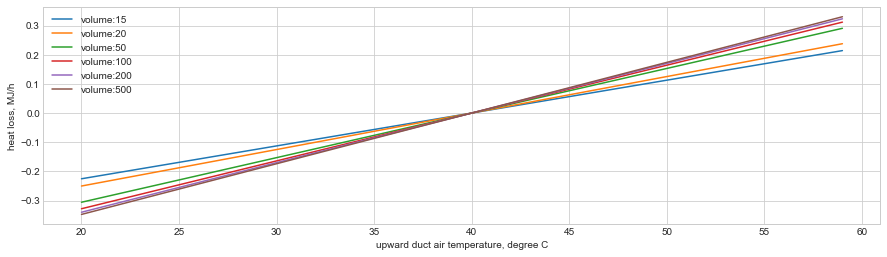

In [15]:
xs = np.arange(start=20.0, stop=60.0, step=1.0)

vs = [15, 20, 50, 100, 200, 500]
ys = [np.vectorize(cs.get_duct_heat_loss_from_upside_temperature)(t_sur=40.0, t_up=xs, v=v, t_ac=20.0, psi=0.49, length=10) for v in vs]

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
for (y,v) in zip(ys, vs):
    ax.plot(xs, y, label='volume:'+ str(v))
ax.set_xlabel('upward duct air temperature, degree C')
ax.set_ylabel('heat loss, MJ/h')
plt.legend()
plt.show()

$$ \theta_{down} = \theta_{sur} + \left( \theta_{up} - \theta_{sur} \right) \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) $$

## expornantial の値の変化 1

$$ \exp \left( \frac{ \psi l \times 3600 }{ c \rho V } \right) $$

In [16]:
def exp_value(psi, length, c, rho, v):
    if c * rho * v == 0.0:
        return 0.0
    else:
        return np.exp(psi * length * 3600 / (c * rho * v))

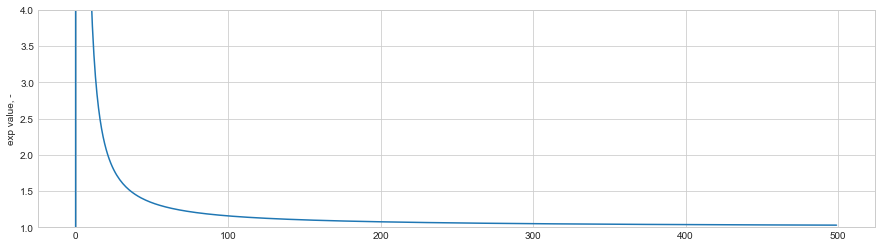

In [17]:
xs = np.arange(500.0)
ys = np.vectorize(exp_value)(psi=0.49, length=10.0, c=1006, rho=1.2, v=xs)
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
ax.plot(xs, ys)
ax.set_ylabel('exp value, -')
ax.set_ylim(bottom=1.0, top=4.0)
plt.show()

$$ \exp \left( - \frac{ \psi l \times 3600 }{ c \rho V } \right) $$

In [18]:
def exp_value(psi, length, c, rho, v):
    if c * rho * v == 0.0:
        return 0.0
    else:
        return np.exp( - psi * length * 3600 / (c * rho * v))

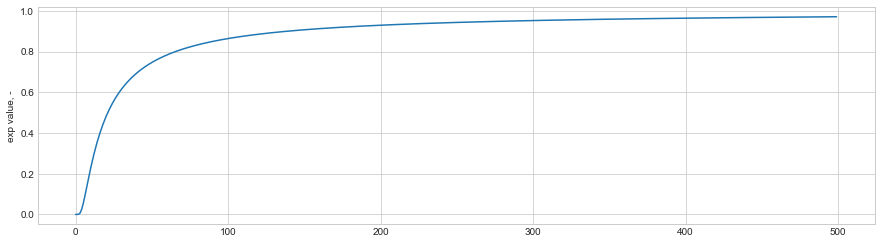

In [19]:
xs = np.arange(500.0)
ys = np.vectorize(exp_value)(psi=0.49, length=10.0, c=1006, rho=1.2, v=xs)
fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
ax.plot(xs, ys)
ax.set_ylabel('exp value, -')
plt.show()

# 機械換気量（最低風量）

In [20]:
ac.get_mechanical_ventilation(6)

array([60., 20., 40., 20., 20.])

In [21]:
ac.get_total_duct_length(6)

array([25.6,  8.6, 10.2, 11.8,  8.1])

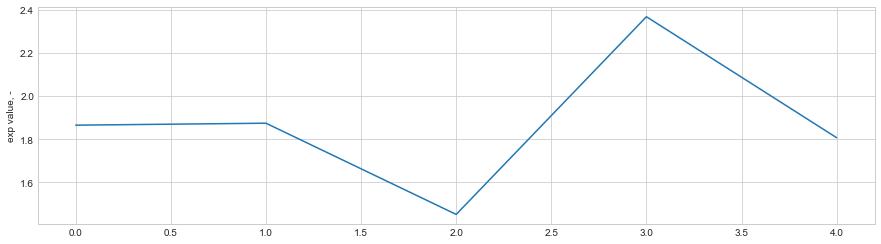

In [22]:
def exp_value(psi, length, c, rho, v):
    if c * rho * v == 0.0:
        return 0.0
    else:
        return np.exp(psi * length * 3600 / (c * rho * v))
    
vs = ac.get_mechanical_ventilation(6)
ls = ac.get_total_duct_length(6)
ys = np.vectorize(exp_value)(psi=0.49, length=ls, c=1006, rho=1.2, v=vs)

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
ax.plot(ys)
ax.set_ylabel('exp value, -')
plt.show()

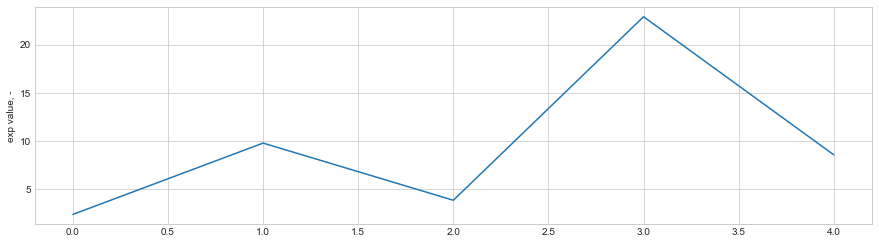

In [23]:
def exp_value(psi, length, c, rho, v):
    if c * rho * v == 0.0:
        return 0.0
    else:
        return np.exp(psi * length * 3600 / (c * rho * v))
    
vs = ac.get_mechanical_ventilation(10)
ls = ac.get_total_duct_length(10)
ys = np.vectorize(exp_value)(psi=0.49, length=ls, c=1006, rho=1.2, v=vs)

fig = plt.figure(figsize=(15,4))
ax = fig.subplots()
ax.plot(ys)
ax.set_ylabel('exp value, -')
plt.show()